In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../novelgraphs/'))

import novelgraphs as ng

import pandas as pd
from collections import defaultdict, Counter
from itertools import combinations
import networkx as nx
from operator import itemgetter
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from numpy import array_split
import numpy
import json

In [2]:
# with open('../text/The Picture of Dorian Gray.txt', encoding='utf-8') as file:
#     dorian = file.read()

In [4]:
# dorian

In [2]:
text = ng.Text.from_pickle('dorian_table.pickle')
# text = ng.Text(dorian)

In [3]:
text.tags.head()

SentenceID  TokenID    Token    Lemma  Pos     NER DepParse    DepRel  \
0           0        0      The      the   DT       O        1       det   
1           0        1  Picture  picture  NNP       O       -1      ROOT   
2           0        2       of       of   IN       O        6      case   
3           0        3   Dorian   dorian  NNP  PERSON        6  compound   
4           0        4     Gray     gray  NNP  PERSON        6  compound   

  NerNpID  Sentiment QuotationID DialogID CharacterID  
0    None        NaN        None     None        None  
1    None        NaN        None     None        None  
2    None        NaN        None     None        None  
3       0        NaN        None     None          16  
4       0       -0.5        None     None          16

In [5]:
core = ng.annotators.CoreNLP()
np = ng.annotators.NerNpID()
ann = ng.annotators.Sentiment()
ann2 = ng.annotators.Dialog()
qq = ng.annotators.Quote()
fp = ng.annotators.FirstPerson()
char = ng.annotators.Character()

In [5]:
# pipeline = ng.annotators.Pipeline([core, np, ann, qq, ann2, fp, char])
# pipeline.annotate(text)

In [6]:
# text.to_pickle('dorian_table.pickle')

In [4]:
dialog = ng.interaction.extractors.Dialog()
sentences = ng.interaction.extractors.Sentences()
sent_dist = ng.interaction.extractors.SentenceDistance()
tokens = ng.interaction.extractors.TokenDistance()
seq = ng.interaction.extractors.TokenSequence()
dep = ng.interaction.extractors.TokenDependencies()

count = ng.interaction.aggregators.Count()
sentiment = ng.interaction.aggregators.Sentiment()

In [5]:
def graph_weights(graph):
    return [edge[2]['weight'] for edge in graph.edges(data=True)]

In [11]:
text.characters

['hetty',
 'sibyl',
 'anthony sherard',
 'campbell',
 'capulet',
 'duke de valentinois',
 'marguerite de navarre',
 'anne de joyeuse',
 'pierre de boniface',
 'alfonso de ovalle',
 'catherine de medicis',
 'prince charming',
 'erskine',
 'john the priest',
 'ruxton',
 'lady hamilton',
 'gray',
 'tom hardy',
 'uncle george',
 'gian maria visconti',
 'geoffrey',
 'elizabeth',
 'margaret',
 'sigismondo malatesta',
 'hallward',
 'clovis eve',
 'pietro riario',
 'pietro barbi',
 'henry ashton',
 'jim',
 'james vane',
 'herbert',
 'adrian',
 'bernal diaz',
 'ned langton',
 'nero',
 'paul the second',
 'charles the rash',
 'louis xii',
 'louis quatorze',
 'louis xiv',
 'les cent nouvelles',
 'duchess of monmouth',
 'leonardus camillus',
 'giambattista cibo',
 'cyril tourneur',
 'manon lescaut',
 'francis',
 'ernest harrowden',
 'grifonetto baglioni',
 'brandon',
 'radley',
 'chapman',
 'lady gwendolen',
 'lady henry',
 'agatha',
 'lady branksome',
 'narborough',
 'king james',
 'piers gavesto

### My graph (gold)

In [86]:
my_char_list = []
for char in [16,66,24,55,50,119,67,12,104,167,47,132,54,149,135,1,30,3,20,42,57,14,32]:
    my_char_list.append(text.characters[char])

In [87]:
my_char_list[:5]

['gray', 'henry wotton', 'hallward', 'agatha', 'brandon']

In [88]:
My_graph = nx.Graph()
My_graph.add_edges_from([(my_char_list[0],my_char_list[1]), (my_char_list[0],my_char_list[2]), 
                         (my_char_list[0],my_char_list[3]), (my_char_list[0],my_char_list[4]),
                         (my_char_list[1],my_char_list[2]), (my_char_list[1],my_char_list[3]),
                         (my_char_list[1],my_char_list[5]), (my_char_list[2],my_char_list[4]),
                         (my_char_list[1],my_char_list[7]), (my_char_list[1],my_char_list[6]),
                         (my_char_list[1],my_char_list[8]), (my_char_list[1],my_char_list[9]),
                         (my_char_list[3],my_char_list[7]), (my_char_list[3],my_char_list[6]),
                         (my_char_list[3],my_char_list[9]), (my_char_list[3],my_char_list[8]),
                         (my_char_list[6],my_char_list[7]), (my_char_list[6],my_char_list[9]),
                         (my_char_list[6],my_char_list[8]), (my_char_list[8],my_char_list[9]),
                         (my_char_list[0],my_char_list[10]), (my_char_list[0],my_char_list[11]),
                         (my_char_list[0],my_char_list[17]), (my_char_list[0],my_char_list[13]),
                         (my_char_list[0],my_char_list[14]), (my_char_list[0],my_char_list[12]),
                         (my_char_list[1],my_char_list[12]), (my_char_list[0],my_char_list[15]),
                         (my_char_list[15],my_char_list[16]), (my_char_list[0],my_char_list[16]),
                         (my_char_list[0],my_char_list[18]), (my_char_list[18],my_char_list[16]),
                         (my_char_list[0],my_char_list[22]), (my_char_list[1],my_char_list[18]),
                         (my_char_list[1],my_char_list[20]), (my_char_list[0],my_char_list[20]),
                         (my_char_list[1],my_char_list[19]), (my_char_list[0],my_char_list[19]),
                         (my_char_list[19],my_char_list[18]), (my_char_list[20],my_char_list[21])])

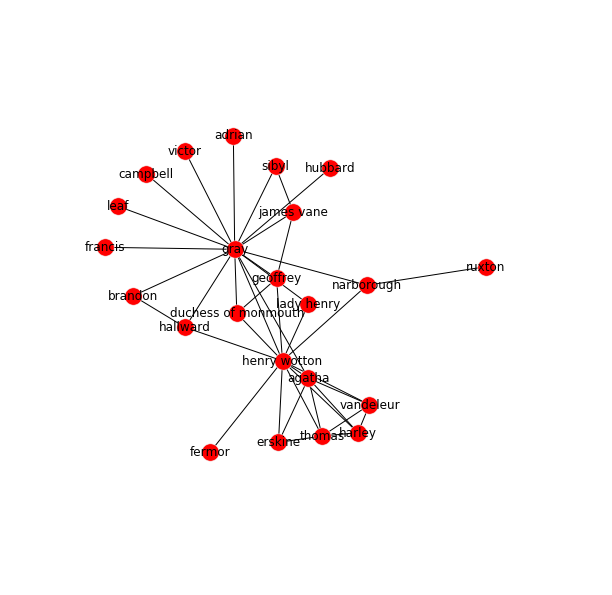

In [89]:
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx(My_graph,
                 with_labels=True)
plt.show()

In [60]:
print(nx.info(My_graph))
# print(i, " count")
print('-----------------')
print('Связанный граф: ', nx.is_connected(My_graph))
# print("Для несвязанного графа нельзя посмотреть центральные узлы")
if nx.is_connected(My_graph):
    print('-----------------')
    print('Центральные узлы графа: ', nx.center(My_graph)[:5])
    print('Периферийные узлы графа: ', nx.periphery(My_graph)[:5])
    print('Наибольшее кратчайшее расстояние в графе: ', nx.diameter(My_graph))
    print('Среднее кратчайшее расстояние', nx.average_shortest_path_length(My_graph))
print('-----------------')
print('Средний кластерный коэффициент: ', nx.average_clustering(My_graph))
print('Центральные узлы: ', [i[0] for i in sorted(nx.degree_centrality(My_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print('Срединные узлы: ', [i[0] for i in sorted(nx.betweenness_centrality(My_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print('Близкие к другим словам узлы: ', [i[0] for i in sorted(nx.closeness_centrality(My_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print("Центральность, связанная с собственными векторами: ", 
      [i[0] for i in sorted(nx.eigenvector_centrality_numpy(My_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print('Количество клик: ', nx.graph_number_of_cliques(My_graph))
print('Размер наибольшей клики:', nx.graph_clique_number(My_graph))

Name: 
Type: Graph
Number of nodes: 23
Number of edges: 40
Average degree:   3.4783
-----------------
Связанный граф:  True
-----------------
Центральные узлы графа:  ['henry wotton', 'narborough', 'gray']
Периферийные узлы графа:  ['sibyl', 'james vane', 'vandeleur', 'adrian', 'thomas']
Наибольшее кратчайшее расстояние в графе:  3
Среднее кратчайшее расстояние 2.0948616600790513
-----------------
Средний кластерный коэффициент:  0.480171277997365
Центральные узлы:  ['gray', 'henry wotton', 'agatha', 'thomas', 'vandeleur']
Срединные узлы:  ['gray', 'henry wotton', 'narborough', 'agatha', 'geoffrey']
Близкие к другим словам узлы:  ['gray', 'henry wotton', 'agatha', 'narborough', 'geoffrey']
Центральность, связанная с собственными векторами:  ['henry wotton', 'gray', 'agatha', 'thomas', 'geoffrey']
Количество клик:  18
Размер наибольшей клики: 5


In [85]:
!mkdir -p ./projectgraphs/dorian

In [91]:
# nx.write_gml(My_graph,'./projectgraphs/dorian/graph_gold.gml')

### Senti_graphs

Name: 
Type: Graph
Number of nodes: 92
Number of edges: 596
Average degree:  12.9565
<novelgraphs.interaction.extractors.dialog.Dialog object at 0x10b47d748>  sentiment
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.8117669535580326
Центральные узлы:  ['gray', 'harry', 'henry wotton', 'sibyl', 'hallward']
Срединные узлы:  ['gray', 'harry', 'sibyl', 'henry wotton', 'prince charming']
Близкие к другим словам узлы:  ['gray', 'harry', 'henry wotton', 'sibyl', 'hallward']
Центральность, связанная с собственными векторами:  ['hallward', 'campbell', 'prince charming', 'willis', 'erskine']
Количество клик:  43
Размер наибольшей клики: 18


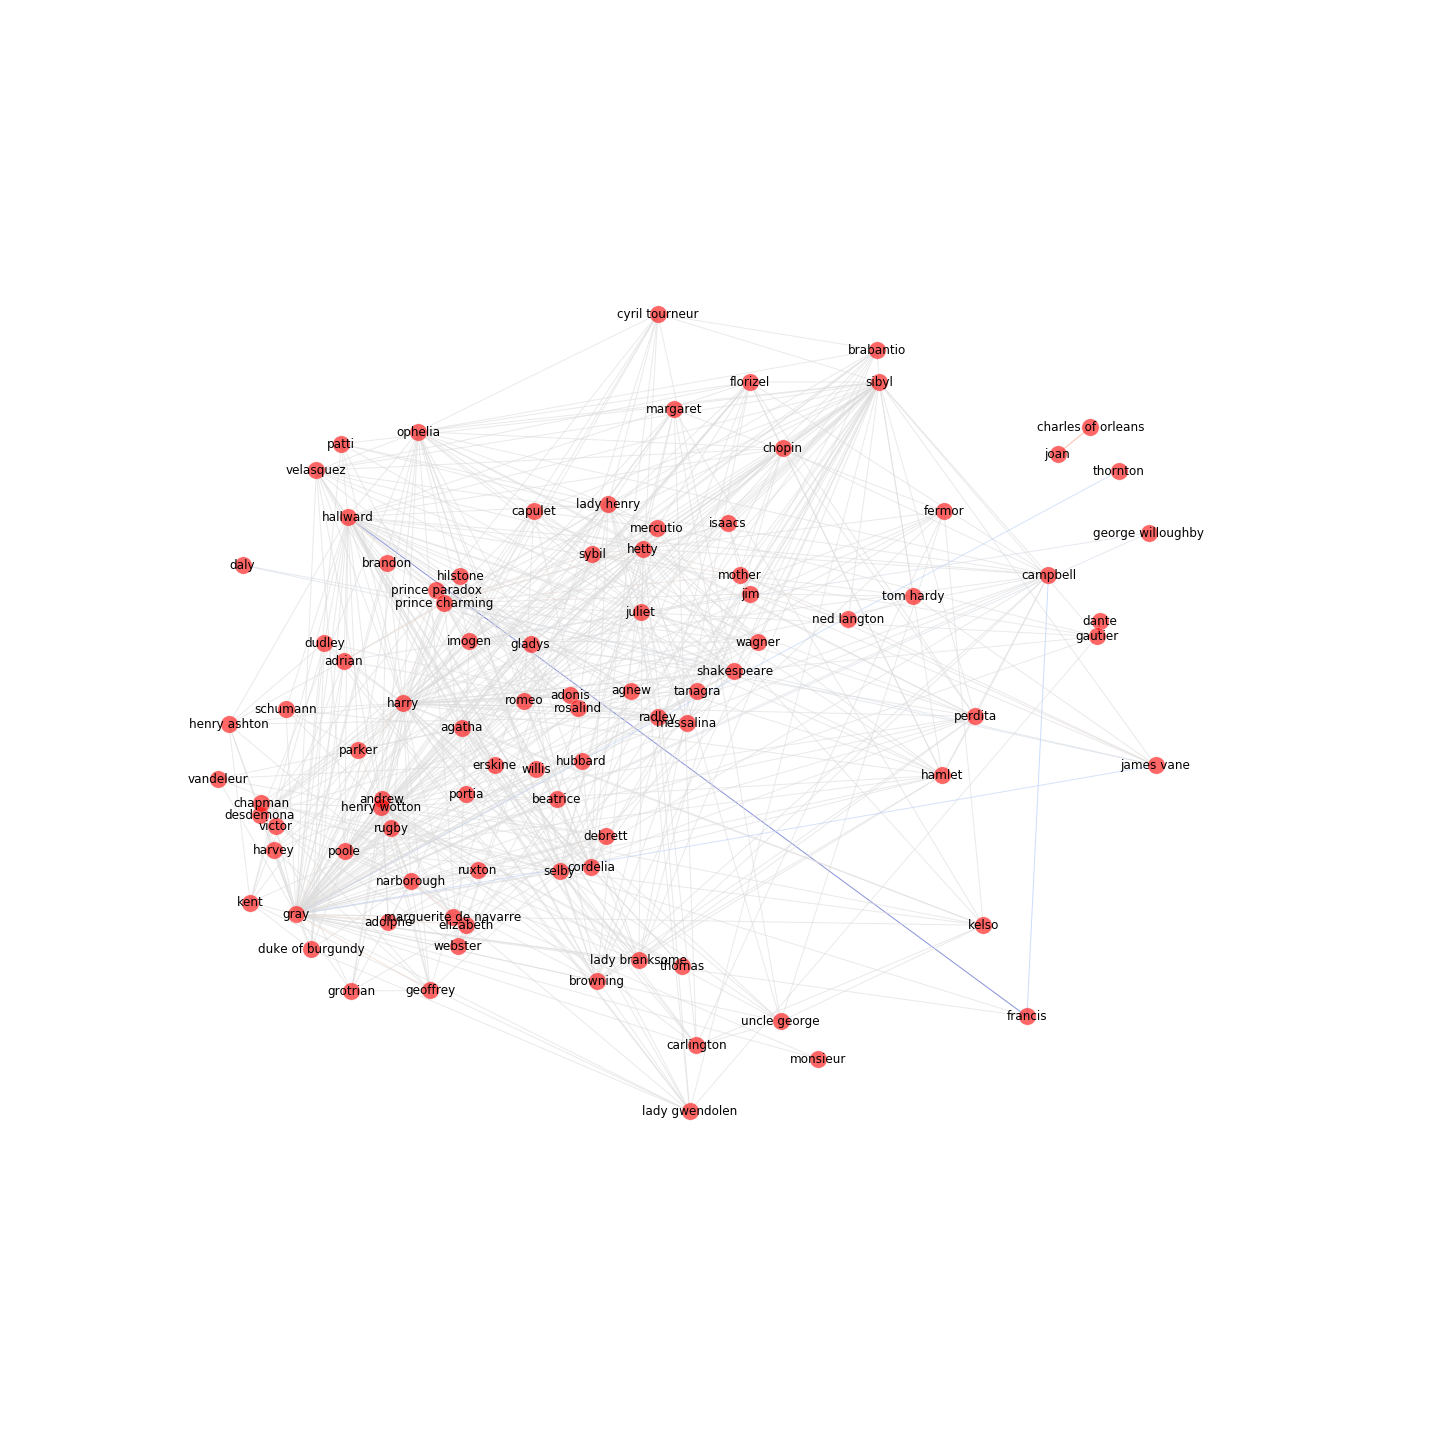

Name: 
Type: Graph
Number of nodes: 76
Number of edges: 224
Average degree:   5.8947
<novelgraphs.interaction.extractors.sentences.Sentences object at 0x10b47d358>  sentiment
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.5642400769151618
Центральные узлы:  ['gray', 'polyssena', 'pietro barbi', 'astorre', 'ginevra']
Срединные узлы:  ['gray', 'henry wotton', 'sibyl', 'ruxton', 'ophelia']
Близкие к другим словам узлы:  ['gray', 'henry wotton', 'polyssena', 'pietro barbi', 'astorre']
Центральность, связанная с собственными векторами:  ['prince paradox', 'parker', 'sibyl', 'victor', 'campbell']
Количество клик:  37
Размер наибольшей клики: 18


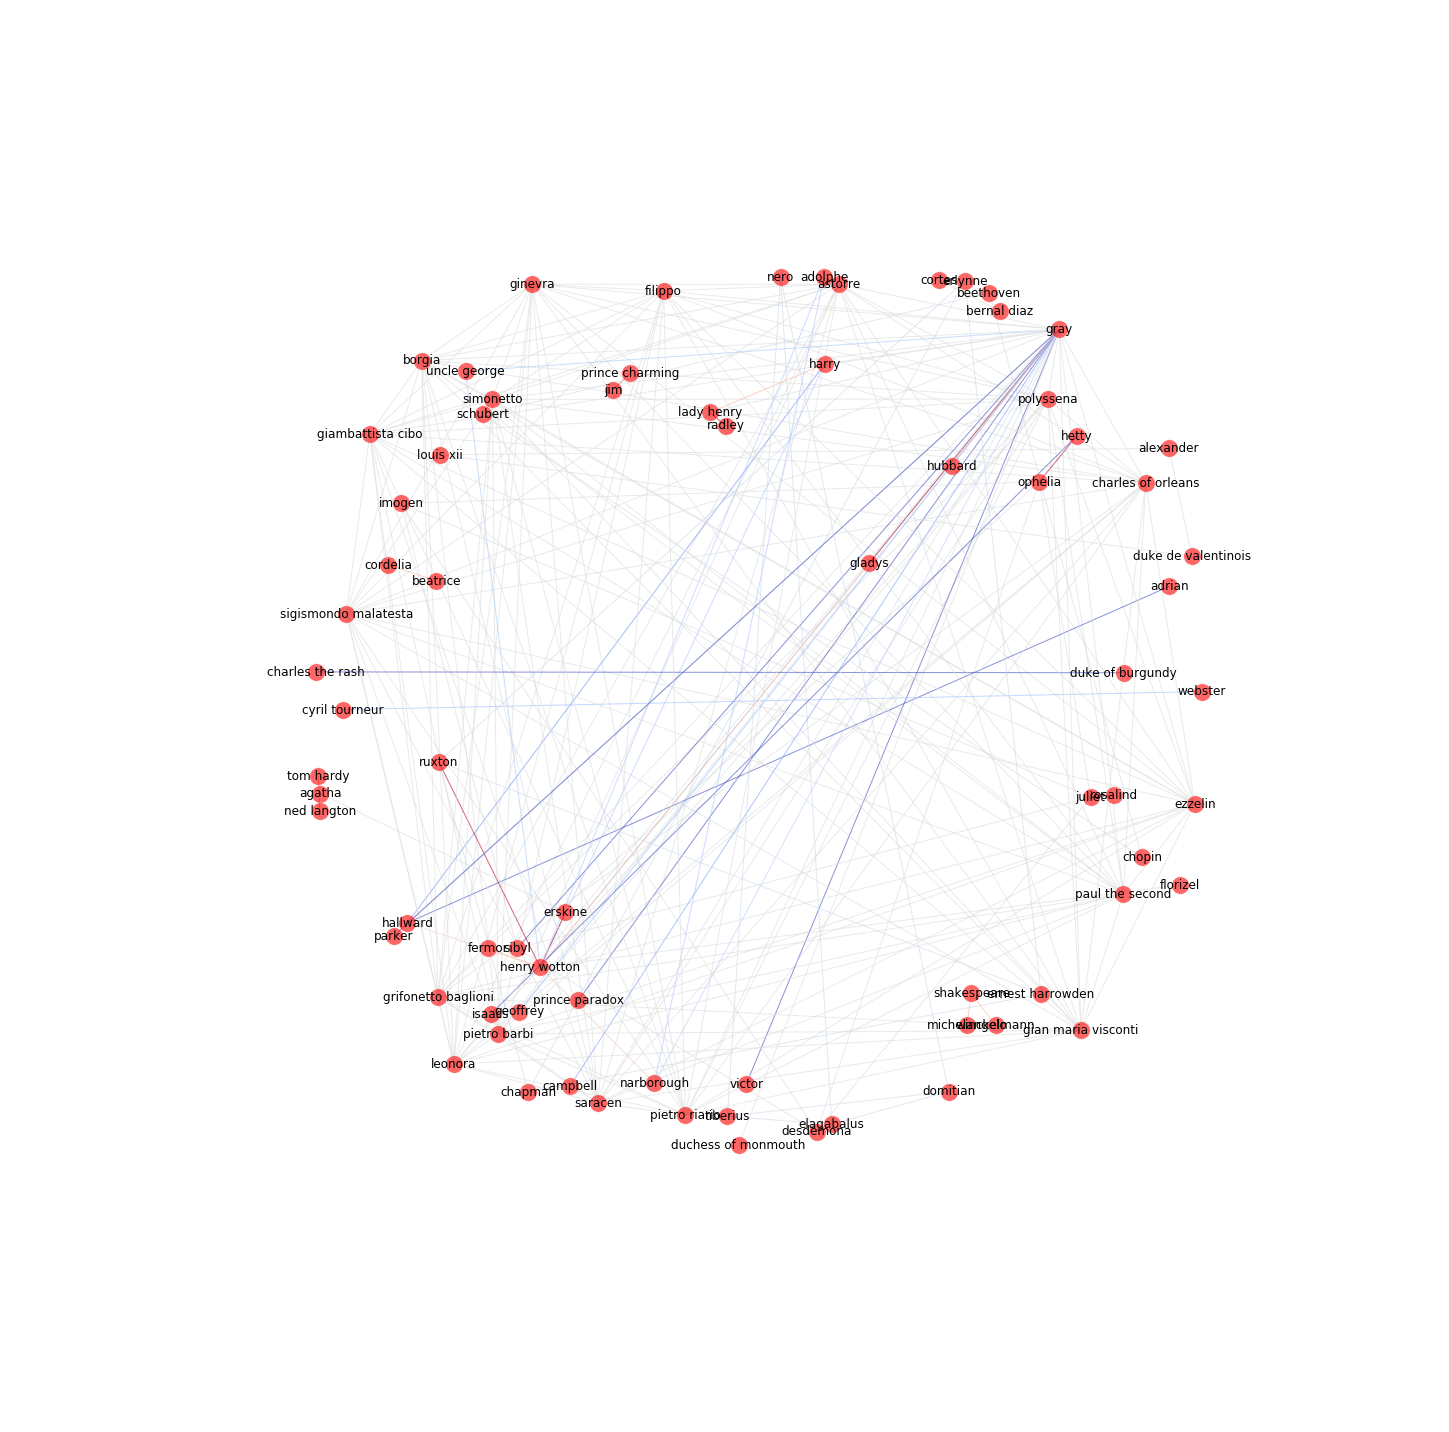

Name: 
Type: Graph
Number of nodes: 57
Number of edges: 65
Average degree:   2.2807
<novelgraphs.interaction.extractors.tokendistance.TokenDistance object at 0x10b47d470>  sentiment
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.15593827874529628
Центральные узлы:  ['gray', 'henry wotton', 'sibyl', 'hallward', 'harry']
Срединные узлы:  ['gray', 'juliet', 'sibyl', 'ophelia', 'cordelia']
Близкие к другим словам узлы:  ['gray', 'juliet', 'sibyl', 'henry wotton', 'harry']
Центральность, связанная с собственными векторами:  ['narborough', 'francis', 'kelso', 'adrian', 'james vane']
Количество клик:  51
Размер наибольшей клики: 3


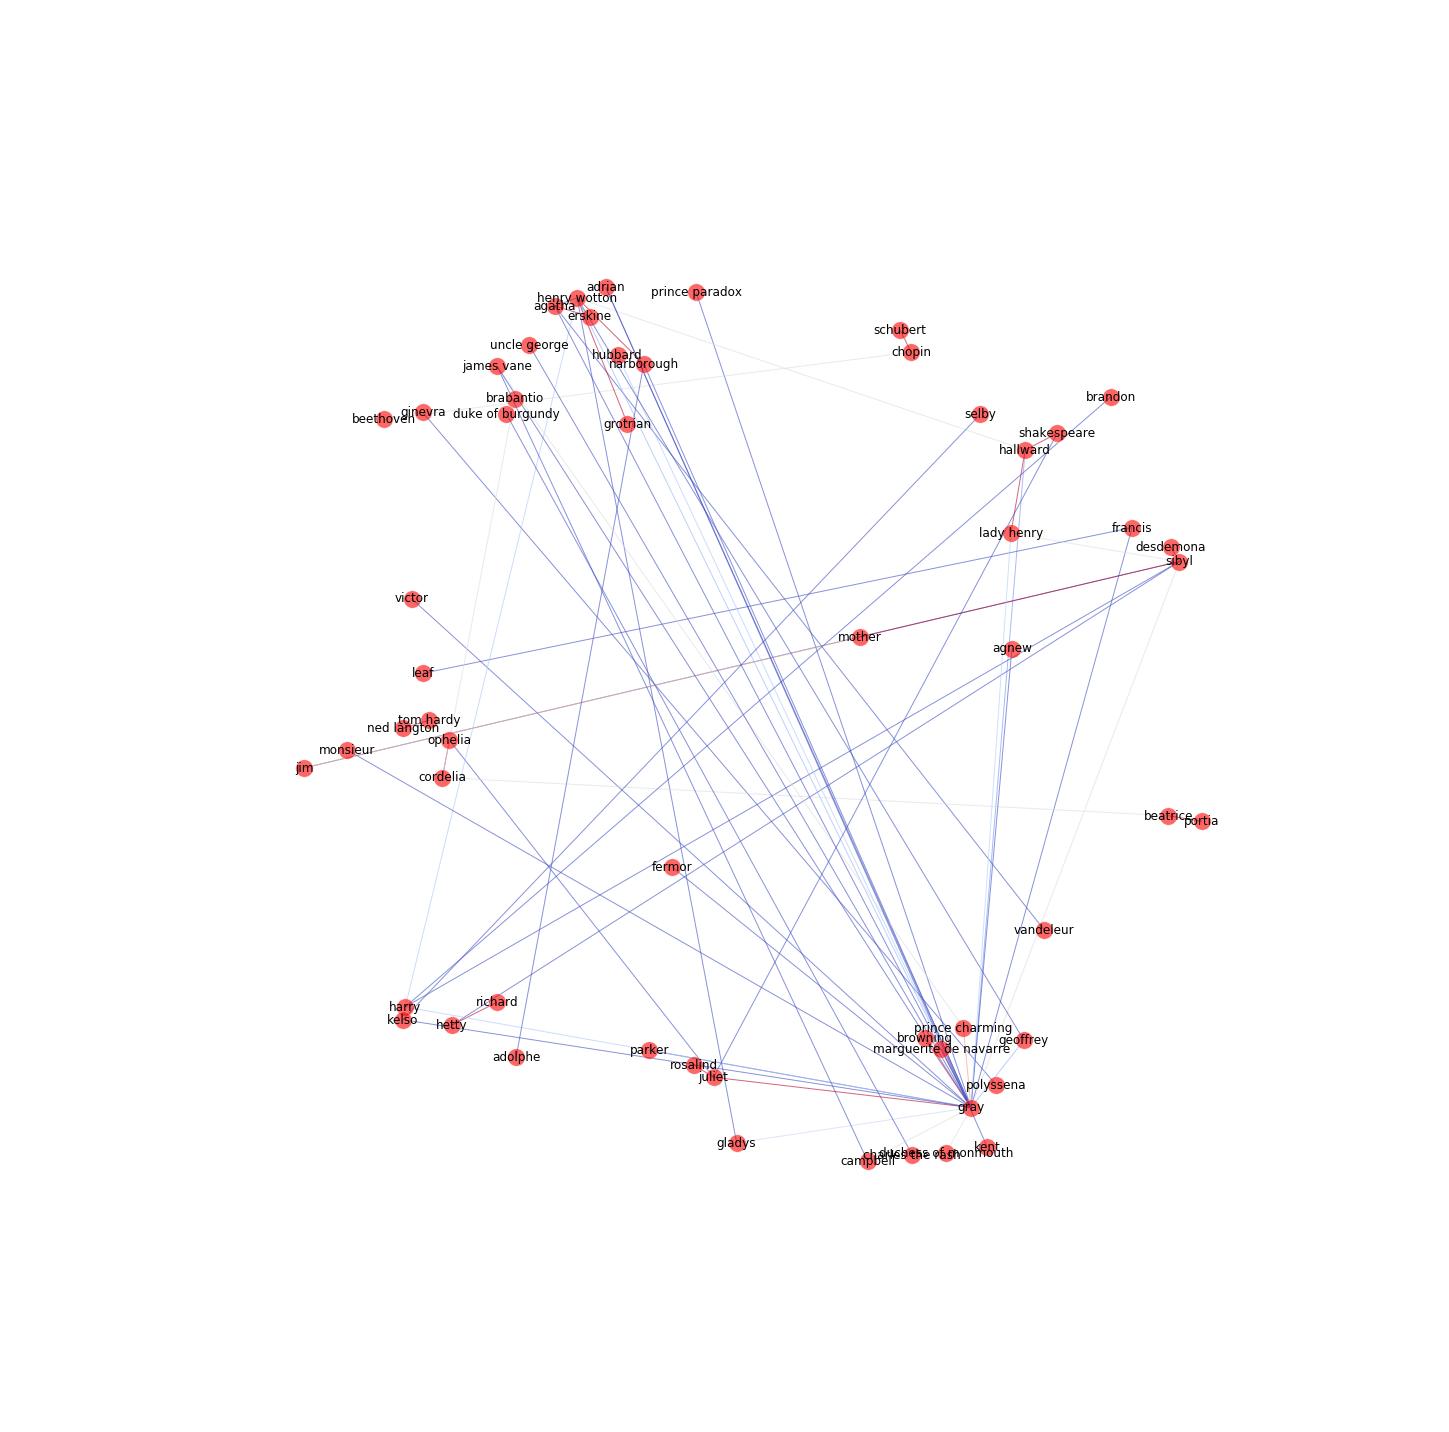

Name: 
Type: Graph
Number of nodes: 146
Number of edges: 209
Average degree:   2.8630
<novelgraphs.interaction.extractors.sentencedistance.SentenceDistance object at 0x10b47d438>  sentiment
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.17724241904688945
Центральные узлы:  ['gray', 'henry wotton', 'lady henry', 'hallward', 'harry']
Срединные узлы:  ['gray', 'lady henry', 'hallward', 'henry wotton', 'elagabalus']
Близкие к другим словам узлы:  ['gray', 'hallward', 'harry', 'lady henry', 'henry wotton']
Центральность, связанная с собственными векторами:  ['monsieur', 'patti', 'fermor', 'uncle george', 'miranda']
Количество клик:  147
Размер наибольшей клики: 5


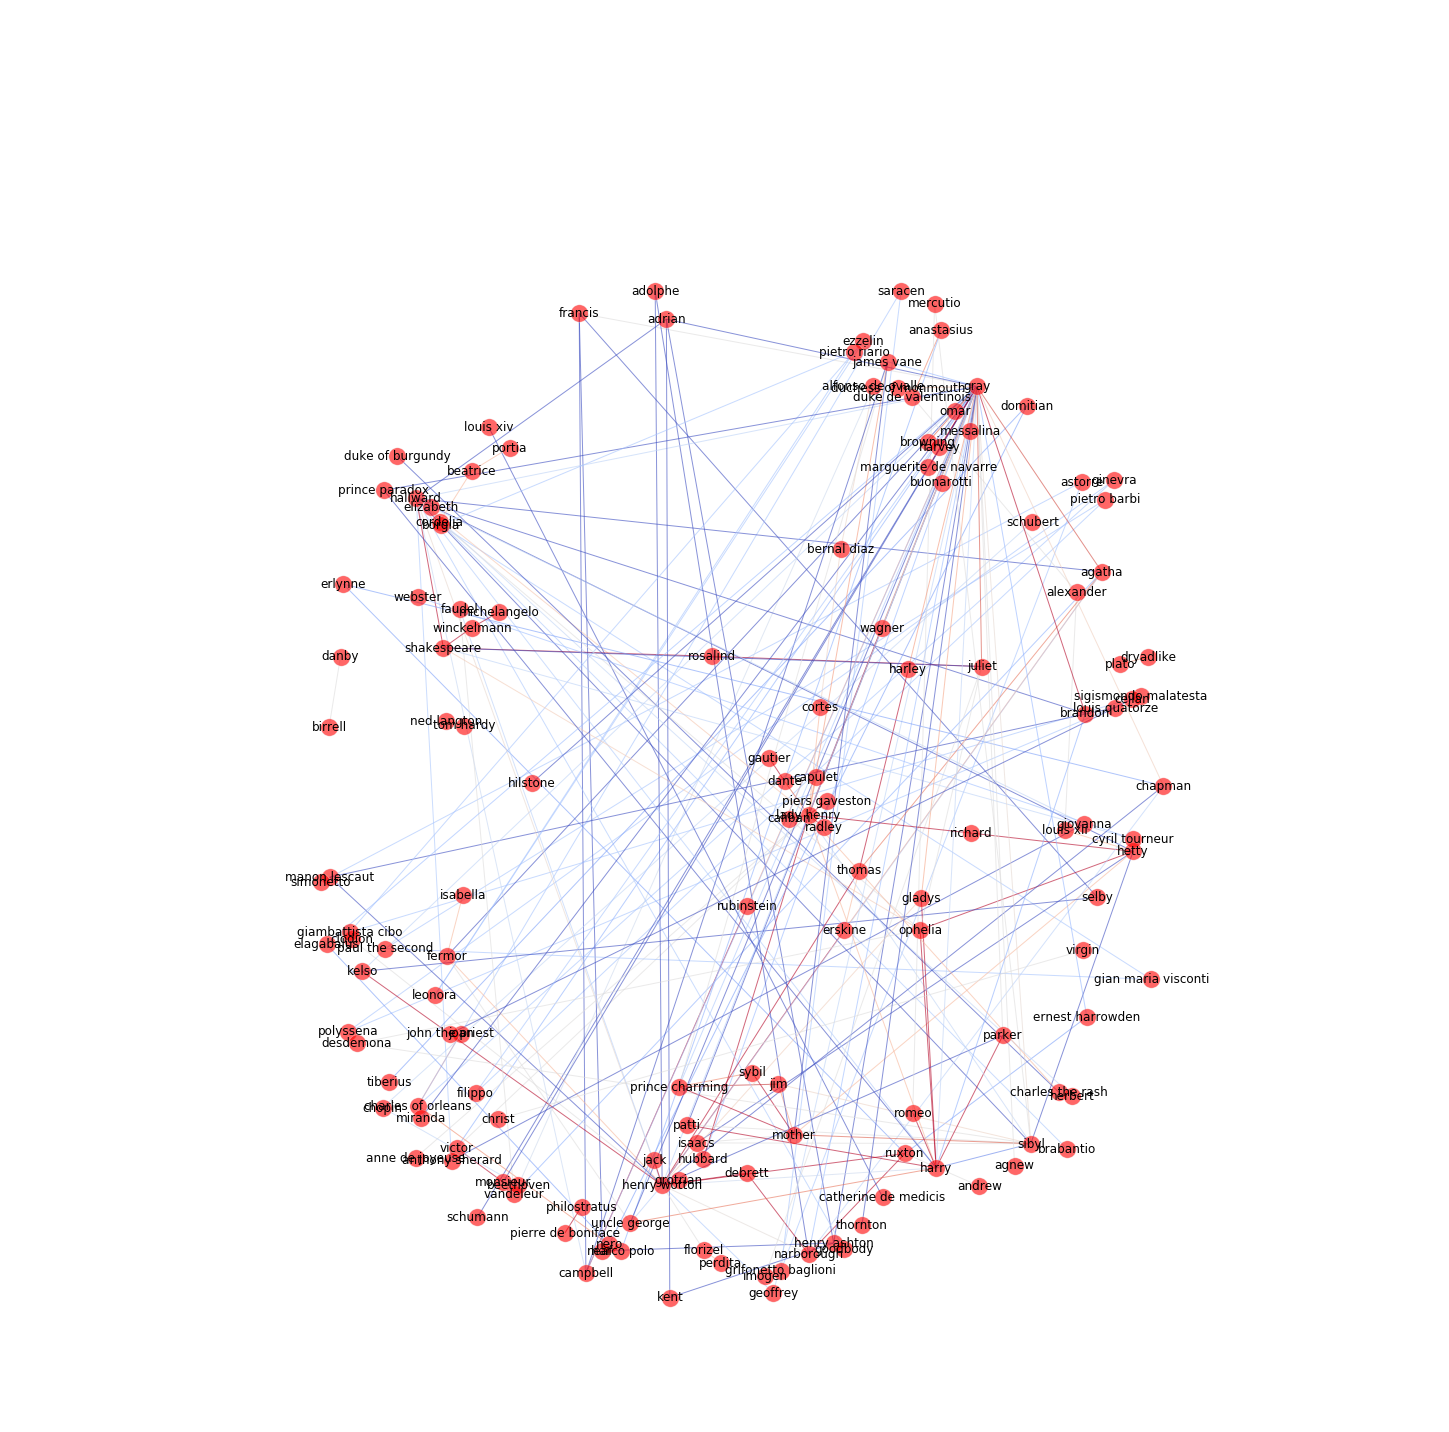

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

<novelgraphs.interaction.extractors.tokensequence.TokenSequence object at 0x10b47d240>  sentiment
-----------------
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 7
Average degree:   1.4000
<novelgraphs.interaction.extractors.tokendependencies.TokenDependencies object at 0x10b47d278>  sentiment
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.0
Центральные узлы:  ['gray', 'henry wotton', 'prince paradox', 'borgia', 'ruxton']
Срединные узлы:  ['gray', 'henry wotton', 'prince paradox', 'borgia', 'ruxton']
Близкие к другим словам узлы:  ['gray', 'henry wotton', 'prince paradox', 'lady henry', 'filippo']
Центральность, связанная с собственными векторами:  ['prince paradox', 'filippo', 'lady henry', 'louis xii', 'gian maria visconti']
Количество клик:  7
Размер наибольшей клики: 2


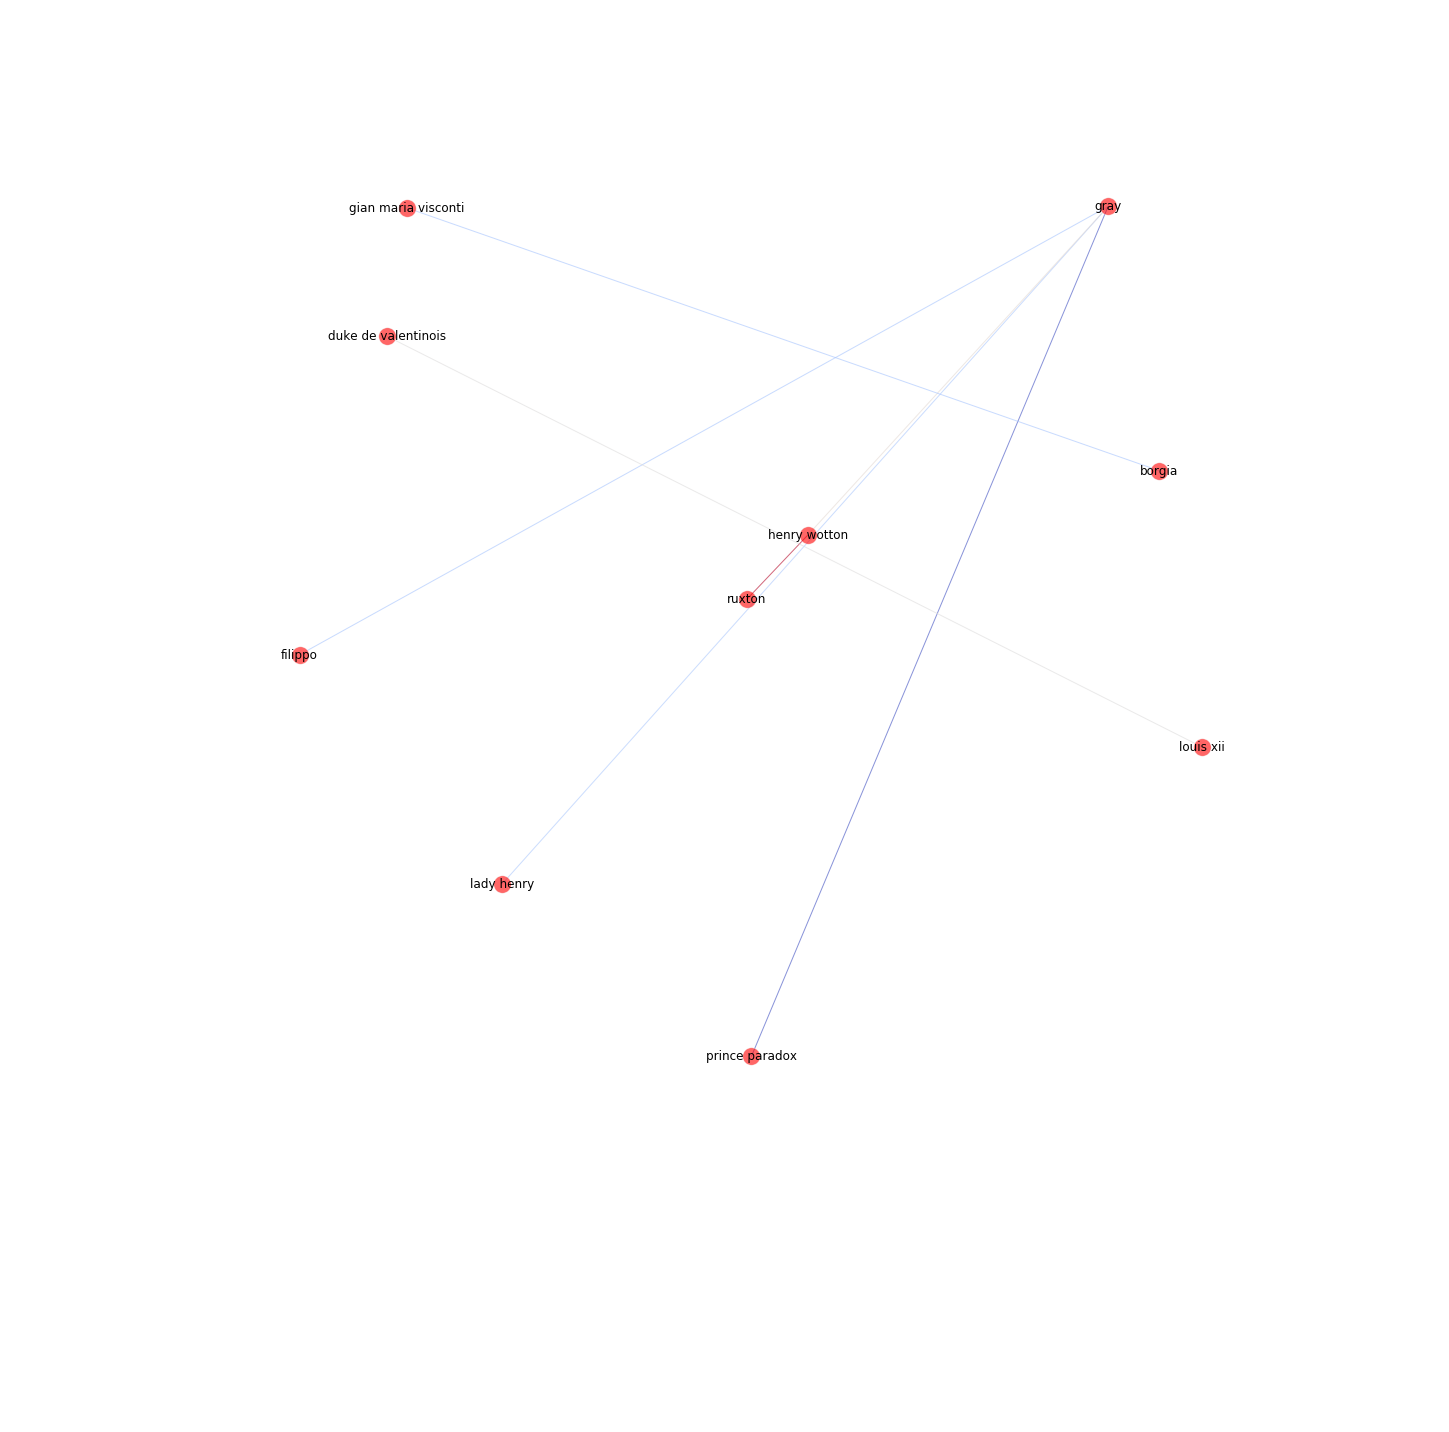

In [8]:
senti_graphs = []
for i in [dialog, sentences, tokens, sent_dist, seq, dep]:
    novelgraph = ng.NovelGraph(i, sentiment)
    graph = novelgraph(text)

    weights = graph_weights(graph)
    
    senti_graphs.append(graph)
    print(nx.info(graph))
    print(i, " sentiment")
    print('-----------------')
    if nx.info(graph).split('\n')[2].split(' ')[3] != '0':
        print('Связанный граф: ', nx.is_connected(graph))

        if nx.is_connected(graph):
            print('-----------------')
            print('Центральные узлы графа: ', nx.center(graph)[:5])
            print('Периферийные узлы графа: ', nx.periphery(graph)[:5])
            print('Наибольшее кратчайшее расстояние в графе: ', nx.diameter(graph))
            print('Среднее кратчайшее расстояние', nx.average_shortest_path_length(graph))
        print('-----------------')
        print('Средний кластерный коэффициент: ', nx.average_clustering(graph))
        print('Центральные узлы: ', [i[0] for i in sorted(nx.degree_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
        print('Срединные узлы: ', [i[0] for i in sorted(nx.betweenness_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
        print('Близкие к другим словам узлы: ', [i[0] for i in sorted(nx.closeness_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
        print("Центральность, связанная с собственными векторами: ", 
              [i[0] for i in sorted(nx.eigenvector_centrality_numpy(graph).items(), key=itemgetter(1), reverse=True)[:5]])
        print('Количество клик: ', nx.graph_number_of_cliques(graph))
        print('Размер наибольшей клики:', nx.graph_clique_number(graph))
        
        plt.figure(figsize=(25, 25))
        plt.axis('off')
        nx.draw_spring(graph,
                         with_labels=True,
                         edge_color=weights,
                         edge_cmap=plt.cm.coolwarm,
                         edge_vmax = 0.5, edge_vmin=-0.5, alpha=0.6)
        
        plt.savefig('./projectgraphs/dorian/graph_senti_{}.pdf'.format(str(i).split('.')[4].split(' ')[0]))
        plt.show()
        
#         nx.write_(graph,'./projectgraphs/dorian/graph_senti_{}.gml'.format(str(i).split('.')[4].split(' ')[0]))

In [110]:
# [dialog, sentences, tokens, sent_dist, seq, dep]
for graph in senti_graphs:
    print('-----------------')
    print('-----------------')
    print('-----------------')
    print(graph.nodes() == my_char_list)
    exception = set(my_char_list) - set(graph.nodes())
    intersection = set(my_char_list) & set(graph.nodes())
    add = set(graph.nodes()) - set(my_char_list)

    
    print('Exception: ', len(exception), exception)
    print('Intersection: ', len(intersection), intersection)
    print('Add-s: ', len(add)) #set(graph.nodes()) - set(my_char_list)#
#     print('Accuracy: ', len(intersection) / len(set(my_char_list)))

    if (len(intersection) != 0 and len(add) != 0):
        precision = len(intersection) / (len(intersection) + len(add))
        print('Precision: ', precision)
        
    if (len(intersection) + len(exception) != 0):
        recall = len(intersection) / (len(intersection) + len(exception))
        print('Recall: ', recall)
        
    print('F: ', 2 * (precision * recall / (precision + recall)))
    
    print('-----------------')
    print(graph.edges() == My_graph.edges())
    exception = set(My_graph.edges()) - set(graph.edges())
    intersection = set(My_graph.edges()) & set(graph.edges())
    add = set(graph.edges()) - set(My_graph.edges())
    
    print('Exception: ', len(exception), exception)
    print('Intersection: ', len(intersection), intersection)
    print('Add-s: ', len(add)) #set(graph.nodes()) - set(my_char_list)#
#     print('Accuracy: ', len(intersection) / len(set(my_char_list)))

    if (len(intersection) != 0 and len(add) != 0):
        precision = len(intersection) / (len(intersection) + len(add))
        print('Precision: ', precision)
        
    if (len(intersection) + len(exception) != 0):
        recall = len(intersection) / (len(intersection) + len(exception))
        print('Recall: ', recall)
        
    if recall != 0 and precision != 0:
        print('F: ', 2 * (precision * recall / (precision + recall)))

-----------------
-----------------
-----------------
False
Exception:  3 {'harley', 'duchess of monmouth', 'leaf'}
Intersection:  20 {'sibyl', 'geoffrey', 'james vane', 'brandon', 'lady henry', 'gray', 'hallward', 'francis', 'henry wotton', 'vandeleur', 'erskine', 'fermor', 'victor', 'adrian', 'agatha', 'campbell', 'ruxton', 'hubbard', 'thomas', 'narborough'}
Add-s:  72
Precision:  0.21739130434782608
Recall:  0.8695652173913043
F:  0.3478260869565218
-----------------
False
Exception:  18 {('hallward', 'brandon'), ('henry wotton', 'harley'), ('vandeleur', 'henry wotton'), ('vandeleur', 'harley'), ('hallward', 'gray'), ('geoffrey', 'gray'), ('harley', 'thomas'), ('agatha', 'harley'), ('geoffrey', 'duchess of monmouth'), ('gray', 'leaf'), ('agatha', 'gray'), ('gray', 'duchess of monmouth'), ('james vane', 'geoffrey'), ('henry wotton', 'lady henry'), ('francis', 'gray'), ('henry wotton', 'duchess of monmouth'), ('gray', 'hubbard'), ('narborough', 'gray')}
Intersection:  22 {('james vane

### Count_graphs

Name: 
Type: Graph
Number of nodes: 99
Number of edges: 609
Average degree:  12.3030
<novelgraphs.interaction.extractors.dialog.Dialog object at 0x1121e0b70>  count
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.8036709859651988
Центральные узлы:  ['gray', 'harry', 'henry wotton', 'sibyl', 'hallward']
Срединные узлы:  ['gray', 'harry', 'sibyl', 'henry wotton', 'hallward']
Близкие к другим словам узлы:  ['gray', 'harry', 'henry wotton', 'hallward', 'sibyl']
Центральность, связанная с собственными векторами:  ['gray', 'henry wotton', 'hallward', 'harry', 'campbell']
Количество клик:  47
Размер наибольшей клики: 18


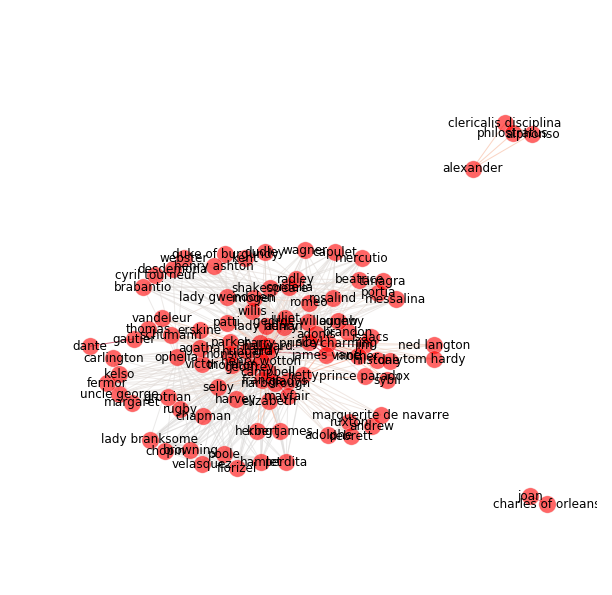

Name: 
Type: Graph
Number of nodes: 101
Number of edges: 264
Average degree:   5.2277
<novelgraphs.interaction.extractors.sentences.Sentences object at 0x1121e0e10>  count
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.5881563156315632
Центральные узлы:  ['gray', 'simonetto', 'polyssena', 'gian maria visconti', 'charles of orleans']
Срединные узлы:  ['gray', 'henry wotton', 'sibyl', 'harry', 'margaret']
Близкие к другим словам узлы:  ['gray', 'henry wotton', 'harry', 'hallward', 'sibyl']
Центральность, связанная с собственными векторами:  ['gray', 'henry wotton', 'hallward', 'lady henry', 'harry']
Количество клик:  52
Размер наибольшей клики: 18


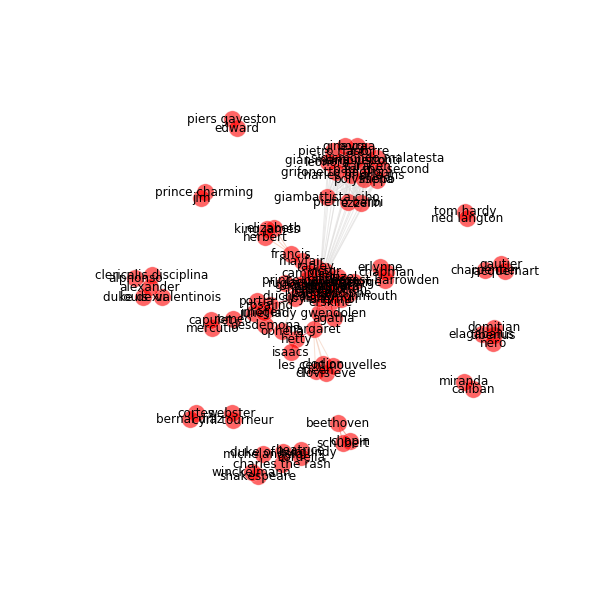

Name: 
Type: Graph
Number of nodes: 105
Number of edges: 133
Average degree:   2.5333
<novelgraphs.interaction.extractors.tokendistance.TokenDistance object at 0x1121e0ba8>  count
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.14148513885841074
Центральные узлы:  ['gray', 'henry wotton', 'harry', 'sibyl', 'hallward']
Срединные узлы:  ['gray', 'harry', 'henry wotton', 'juliet', 'sibyl']
Близкие к другим словам узлы:  ['gray', 'harry', 'henry wotton', 'sibyl', 'hallward']
Центральность, связанная с собственными векторами:  ['gray', 'henry wotton', 'harry', 'hallward', 'lady henry']
Количество клик:  99
Размер наибольшей клики: 4


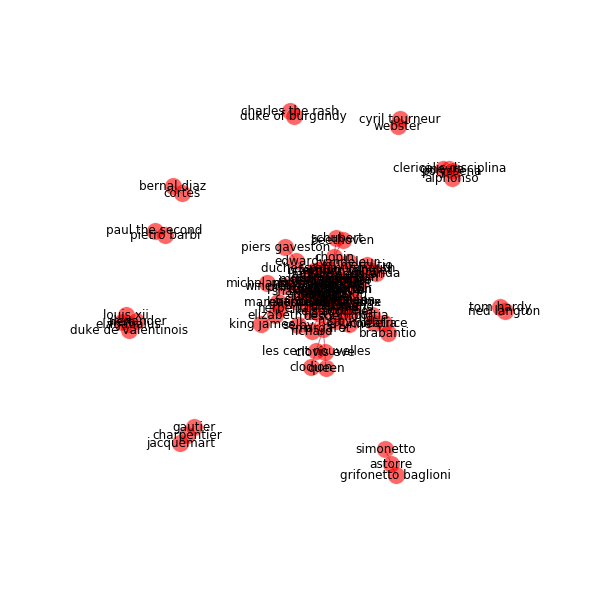

Name: 
Type: Graph
Number of nodes: 162
Number of edges: 249
Average degree:   3.0741
<novelgraphs.interaction.extractors.sentencedistance.SentenceDistance object at 0x1121e09e8>  count
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.1676202242148669
Центральные узлы:  ['gray', 'henry wotton', 'lady henry', 'hallward', 'harry']
Срединные узлы:  ['gray', 'elagabalus', 'henry wotton', 'nero', 'hallward']
Близкие к другим словам узлы:  ['gray', 'hallward', 'harry', 'henry wotton', 'sibyl']
Центральность, связанная с собственными векторами:  ['gray', 'henry wotton', 'harry', 'hallward', 'lady henry']
Количество клик:  179
Размер наибольшей клики: 5


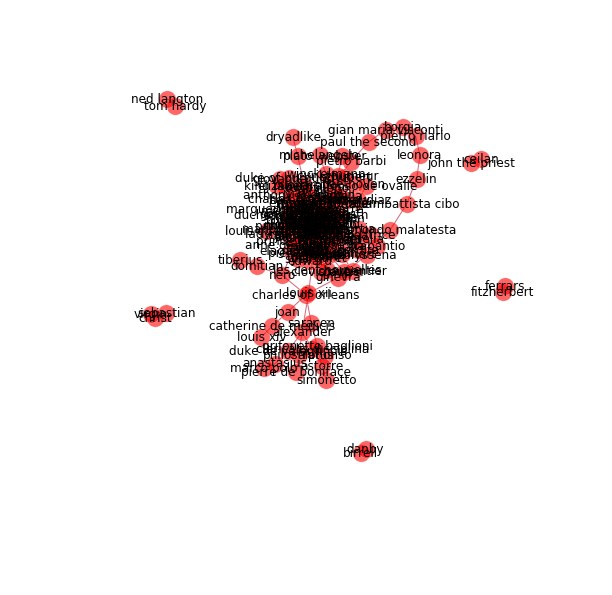

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

<novelgraphs.interaction.extractors.tokensequence.TokenSequence object at 0x1121e0cf8>  count
-----------------
Name: 
Type: Graph
Number of nodes: 16
Number of edges: 13
Average degree:   1.6250
<novelgraphs.interaction.extractors.tokendependencies.TokenDependencies object at 0x1121e0e80>  count
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.07589285714285715
Центральные узлы:  ['gray', 'henry wotton', 'narborough', 'prince paradox', 'duke de valentinois']
Срединные узлы:  ['gray', 'henry wotton', 'prince paradox', 'duke de valentinois', 'narborough']
Близкие к другим словам узлы:  ['gray', 'henry wotton', 'narborough', 'prince paradox', 'hallward']
Центральность, связанная с собственными векторами:  ['gray', 'henry wotton', 'lady henry', 'narborough', 'prince paradox']
Количество клик:  11
Размер наибольшей клики: 3


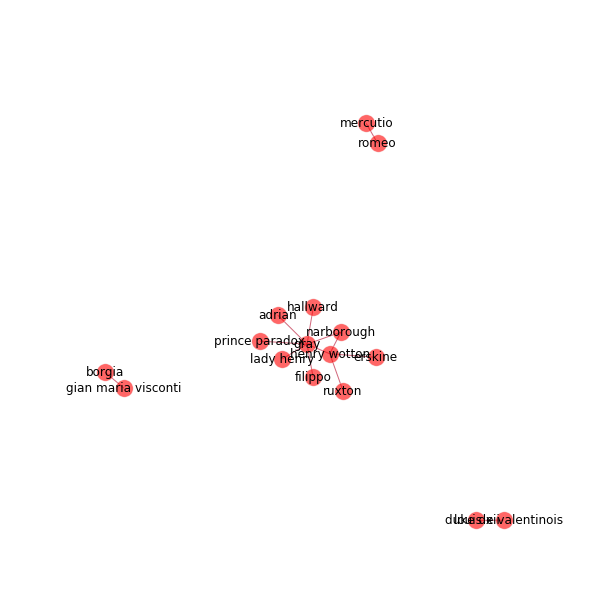

In [101]:
count_graphs = []
for i in [dialog, sentences, tokens, sent_dist, seq, dep]:
    novelgraph = ng.NovelGraph(i, count)
    graph = novelgraph(text)

    weights = graph_weights(graph)
    
    count_graphs.append(graph)
    print(nx.info(graph))
    print(i, " count")
    print('-----------------')
    if nx.info(graph).split('\n')[2].split(' ')[3] != '0':
        print('Связанный граф: ', nx.is_connected(graph))
        # print("Для несвязанного графа нельзя посмотреть центральные узлы")
        if nx.is_connected(graph):
            print('-----------------')
            print('Центральные узлы графа: ', nx.center(graph)[:5])
            print('Периферийные узлы графа: ', nx.periphery(graph)[:5])
            print('Наибольшее кратчайшее расстояние в графе: ', nx.diameter(graph))
            print('Среднее кратчайшее расстояние', nx.average_shortest_path_length(graph))
        print('-----------------')
        print('Средний кластерный коэффициент: ', nx.average_clustering(graph))
        print('Центральные узлы: ', [i[0] for i in sorted(nx.degree_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
        print('Срединные узлы: ', [i[0] for i in sorted(nx.betweenness_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
        print('Близкие к другим словам узлы: ', [i[0] for i in sorted(nx.closeness_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
        print("Центральность, связанная с собственными векторами: ", 
              [i[0] for i in sorted(nx.eigenvector_centrality_numpy(graph).items(), key=itemgetter(1), reverse=True)[:5]])
        print('Количество клик: ', nx.graph_number_of_cliques(graph))
        print('Размер наибольшей клики:', nx.graph_clique_number(graph))
        # print('Ядра:', nx.core_number(conv_graph))

        plt.figure(figsize=(10,10))
        plt.axis('off')
        nx.draw_networkx(graph,
                         with_labels=True,
                         edge_color=weights,
                         edge_cmap=plt.cm.coolwarm,
                         edge_vmax = 0.5, edge_vmin=-0.5, alpha=0.6)
        plt.show()
        nx.write_gml(graph,'./projectgraphs/dorian/graph_count_{}.gml'.format(str(i).split('.')[4].split(' ')[0]))

In [99]:
str(i).split('.')[4].split(' ')[0]

'TokenDependencies'

In [111]:
# [dialog, sentences, tokens, sent_dist, seq, dep]
for graph in count_graphs:
    print('-----------------')
    print('-----------------')
    print('-----------------')
    print(graph.nodes() == my_char_list)
    exception = set(my_char_list) - set(graph.nodes())
    intersection = set(my_char_list) & set(graph.nodes())
    add = set(graph.nodes()) - set(my_char_list)

    
    print('Exception: ', len(exception), exception)
    print('Intersection: ', len(intersection), intersection)
    print('Add-s: ', len(add)) #set(graph.nodes()) - set(my_char_list)#
#     print('Accuracy: ', len(intersection) / len(set(my_char_list)))

    if (len(intersection) != 0 and len(add) != 0):
        precision = len(intersection) / (len(intersection) + len(add))
        print('Precision: ', precision)
        
    if (len(intersection) + len(exception) != 0):
        recall = len(intersection) / (len(intersection) + len(exception))
        print('Recall: ', recall)
        
    print('F: ', 2 * (precision * recall / (precision + recall)))
    
    print('-----------------')
    print(graph.edges() == My_graph.edges())
    exception = set(My_graph.edges()) - set(graph.edges())
    intersection = set(My_graph.edges()) & set(graph.edges())
    add = set(graph.edges()) - set(My_graph.edges())
    
    print('Exception: ', len(exception), exception)
    print('Intersection: ', len(intersection), intersection)
    print('Add-s: ', len(add)) #set(graph.nodes()) - set(my_char_list)#
#     print('Accuracy: ', len(intersection) / len(set(my_char_list)))

    if (len(intersection) != 0 and len(add) != 0):
        precision = len(intersection) / (len(intersection) + len(add))
        print('Precision: ', precision)
        
    if (len(intersection) + len(exception) != 0):
        recall = len(intersection) / (len(intersection) + len(exception))
        print('Recall: ', recall)
        
    if recall != 0 and precision != 0:
        print('F: ', 2 * (precision * recall / (precision + recall)))

-----------------
-----------------
-----------------
False
Exception:  3 {'harley', 'duchess of monmouth', 'leaf'}
Intersection:  20 {'sibyl', 'geoffrey', 'james vane', 'brandon', 'lady henry', 'gray', 'hallward', 'francis', 'henry wotton', 'vandeleur', 'erskine', 'fermor', 'victor', 'adrian', 'agatha', 'campbell', 'ruxton', 'hubbard', 'thomas', 'narborough'}
Add-s:  79
Precision:  0.20202020202020202
Recall:  0.8695652173913043
F:  0.32786885245901637
-----------------
False
Exception:  20 {('hallward', 'brandon'), ('henry wotton', 'harley'), ('vandeleur', 'henry wotton'), ('vandeleur', 'harley'), ('gray', 'victor'), ('hallward', 'gray'), ('geoffrey', 'gray'), ('harley', 'thomas'), ('agatha', 'harley'), ('geoffrey', 'duchess of monmouth'), ('gray', 'leaf'), ('agatha', 'gray'), ('gray', 'duchess of monmouth'), ('james vane', 'geoffrey'), ('henry wotton', 'lady henry'), ('agatha', 'erskine'), ('francis', 'gray'), ('henry wotton', 'duchess of monmouth'), ('gray', 'hubbard'), ('narboroug

### SINNET

In [78]:
with open('../wilde_picture_of_dorian_gray.json') as file:
    json_d = json.load(file)

In [92]:
# nsher

In [93]:
nsher = {}
for number, node in enumerate(json_d['nodes']):
    nsher[number] = node['name']

In [94]:
nlink = []
for link in json_d['links']:
    nlink.append((link['source'], link['target']))

In [95]:
npair = []
for l in nlink:
    npair.append((nsher[l[0]], nsher[l[1]]))

In [96]:
nlinks = set([tuple(sorted(pair)) for pair in npair])

In [108]:
len(nsher)

92

In [106]:
print('--------Nodes--------')
exception = 11
intersection = 11
add = 81
precision = intersection / (intersection + add)
recall = intersection / (intersection + exception)
print('Exception: ', exception)
print('Intersection: ', intersection)
print('Add-s: ', add) #set(graph.nodes()) - set(my_char_list)#

print('Precision: ', precision)
print('Recall: ', recall)
print('F: ', 2 * (precision * recall / (precision + recall)))

print('--------Edges--------')
exception = 29
intersection = 11
add = 44
precision = intersection / (intersection + add)
recall = intersection / (intersection + exception)
print('Exception: ', exception)
print('Intersection: ', intersection)
print('Add-s: ', add) #set(graph.nodes()) - set(my_char_list)#
#     print('Accuracy: ', len(intersection) / len(set(my_char_list)))
print('Precision: ', precision)
print('Recall: ', recall)
if recall != 0 and precision != 0:
    print('F: ', 2 * (precision * recall / (precision + recall)))

--------Nodes--------
Exception:  11
Intersection:  11
Add-s:  81
Precision:  0.11956521739130435
Recall:  0.5
F:  0.1929824561403509
--------Edges--------
Exception:  29
Intersection:  11
Add-s:  44
Precision:  0.2
Recall:  0.275
F:  0.23157894736842108


### Rolling window

In [14]:
def rolling_window_slices(window_size, step, length):
    if length <= 18000:
        window_size = 3000
        step = 1000
    
    num_slices = max((length - window_size) // step, 0)
    return ([slice(i * step, i * step + window_size) for i in range(num_slices)] +
             [slice(num_slices * step, length)])

In [15]:
rolling_window_slices(10000, 2000, len(text.tags))[:5]

[slice(0, 10000, None),
 slice(2000, 12000, None),
 slice(4000, 14000, None),
 slice(6000, 16000, None),
 slice(8000, 18000, None)]

### Negative graph plot

In [27]:
# num_chapters = 10

# chapters = []
# for tags in array_split(text.tags, num_chapters):
#     chapter = ng.Text('')
#     chapter.characters = text.characters
#     chapter.first_person = text.first_person
#     chapter.tags = tags
#     chapters.append(chapter)

In [16]:
novelgraph2 = ng.NovelGraph(dialog, sentiment)

In [21]:
novelgraph = ng.NovelGraph(sent_dist, sentiment)

In [18]:
def get_chapters(window_size, step, length):
    chapters = []
    for slice_t in rolling_window_slices(window_size, step, length):
        tags = text.tags.loc[slice_t]
        chapter = ng.Text('')
        chapter.characters = text.characters
        chapter.first_person = text.first_person
        chapter.tags = tags
        chapters.append(chapter)
    return chapters

In [48]:
chapters = get_chapters(20000, 1000, len(text.tags))

In [49]:
len(chapters)

76

In [50]:
def get_negative_sentiment_balance(chapters):
    text_balance = []
    for i in range(len(chapters)):
        graph = novelgraph(chapters[i])
        weights = graph_weights(graph)
        if weights:
            balance = len([p for p in weights if p < 0]) / len(weights)
            text_balance.append(balance)
    return text_balance

In [51]:
def get_negative_sentiment_balance2(chapters):
    text_balance = []
    for i in range(len(chapters)):
        graph = novelgraph2(chapters[i])
        weights = graph_weights(graph)
        if weights:
            balance = len([p for p in weights if p < 0]) / len(weights)
            text_balance.append(balance)
    return text_balance

In [52]:
negative_graph_sd = get_negative_sentiment_balance(chapters)
negative_graph_di = get_negative_sentiment_balance2(chapters)

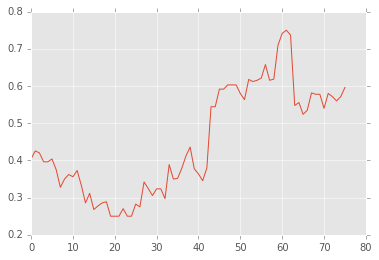

In [53]:
plt.plot(negative_graph_sd)

- Мера сбалансированности: отношение значений < 0 ко всем значениям => чем ближе к 1, тем несбалансированней, чем ближе к 0 - тем ближе к балансу
    - tokens
    - sentences
    
- Seq и Dep могут оказаться пустыми!
    - seq периодически вылетает с ошибкой (добавить проверку i + 2 < len(text))
- количество "глав" должно быть разным для разных произведений (например, для коротких - 5, для длинных - больше)
- 10 хорошее количество глав, но лучше двигаться скользящим окном
- вопрос с nan

### Balanced graph plot

In [54]:
def get_cycles_from_graph(graph):
    cycles = []
    for cycle in nx.cycle_basis(graph):
        cycles.append(list(zip(cycle, cycle[1:])) + [(cycle[-1], cycle[0])])
    return cycles

def is_positive(cycle, graph):
    negatives = 0
    for edge in cycle:
        if graph.edge[edge[0]][edge[1]]['weight'] < 0:
            negatives += 1
    return not negatives % 2

def get_graph_balance(chapters):
    '''Считаем сбалансированность графа: 
    1. выделить простые циклы из графа
    2. определить знак цикла
    3. находим меру сбалансированности - долю положительных циклов среди всех
    '''
    balance_cycle = []
    for i in range(len(chapters)):
        graph = novelgraph(chapters[i])
        graph_cycles = get_cycles_from_graph(graph)
#         print(len(graph_cycles))
        balance = numpy.mean(
            [is_positive(cycle, graph) for cycle in graph_cycles])
        balance_cycle.append(balance)
#     print(balance_cycle) 
    return balance_cycle

In [55]:
def get_graph_balance2(chapters):
    '''Считаем сбалансированность графа: 
    1. выделить простые циклы из графа
    2. определить знак цикла
    3. находим меру сбалансированности - долю положительных циклов среди всех
    '''
    balance_cycle = []
    for i in range(len(chapters)):
        graph = novelgraph2(chapters[i])
        graph_cycles = get_cycles_from_graph(graph)
#         print(len(graph_cycles))
        balance = numpy.mean(
            [is_positive(cycle, graph) for cycle in graph_cycles])
        balance_cycle.append(balance)
#     print(balance_cycle) 
    return balance_cycle

In [56]:
balance = get_graph_balance(chapters)

In [102]:
!mkdir -p ./projectgraphs/plot

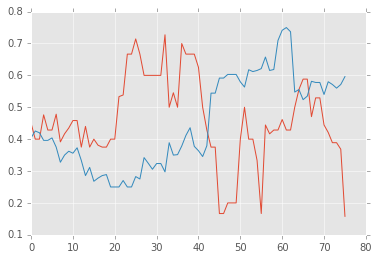

In [103]:
plt.plot(balance, label='Balance')
plt.plot(negative_graph_sd, label='Negative_sent')
# balance = red, negative = blue
plt.savefig('./projectgraphs/plot/balance_dorian.pdf')

55 -- описание его страстей (коллекционирование, музыкальные инструменты) + куча исторических персонажей

In [58]:
balance2 = get_graph_balance2(chapters)

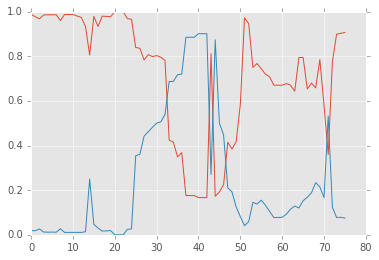

In [104]:
plt.plot(balance2, label='Balance')
plt.plot(negative_graph_di, label='Negative_sent')
plt.savefig('./projectgraphs/plot/balance_dorian_dialog.pdf')

30-41 -- проводы Джеймса во флот, спектакль, прозрение Дориана, разрыв с Сибиллой и ее самоубийство

43-44 -- терзания Дориана по поводу смерти Сибиллы (он винит себя), и размолвка с Безилом (портрет, губительное влияние Дориана на окружающих, его испорченность)

70 -- М-р Кемпбелл и уничтожение трупа Хоулворда

In [60]:
a = rolling_window_slices(20000, 1000, len(text.tags))

In [72]:
# a[30:41]
# a[43:44]
a[55]

slice(55000, 75000, None)

In [73]:
text.tags.loc[(slice(55000, 75000, None)), ['Token', 'Sentiment']]

Token  Sentiment
55000      memory        NaN
55001          of        NaN
55002         the        NaN
55003   innocence        NaN
55004        that        NaN
55005        they        NaN
55006         had        NaN
55007   tarnished        NaN
55008           .        NaN
55009        They        NaN
55010    wondered        NaN
55011         how        NaN
55012         one        NaN
55013          so        NaN
55014    charming        0.5
55015         and        NaN
55016    graceful        NaN
55017          as        NaN
55018          he        NaN
55019         was        NaN
55020       could        NaN
55021        have        NaN
55022     escaped       -0.5
55023         the        NaN
55024       stain        NaN
55025          of        NaN
55026          an        NaN
55027         age        NaN
55028        that        NaN
55029         was        NaN
...           ...        ...
74971        were        NaN
74972          so        NaN
74973    occupied        NaN
74974          in        NaN
74975      trying        NaN
74976          to        NaN
74977       raise        NaN
74978         the        NaN
74979        wind        NaN
74980           ,        NaN
74981        that        NaN
74982           I        NaN
74983       never        NaN
74984         had        NaN
74985        even        NaN
74986           a        NaN
74987  flirtation        NaN
74988        with        NaN
74989     anybody        NaN
74990           .        NaN
74991     However        NaN
74992           ,        NaN
74993        that        NaN
74994         was        NaN
74995         all        NaN
74996  Narborough        NaN
74997          's        NaN
74998       fault        NaN
74999           .        NaN
75000          He        NaN

[20001 rows x 2 columns]

In [105]:
text.first_person

False

In [106]:
text.characters[-1]

'narrator'